In [1]:
import pickle
import pandas as pd
import sys
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
sys.path.append("../code/")

In [4]:
from test_homes import valid_homes_data
from common_functions import out_overall

In [13]:
valid_homes_data['SanDiego']

{'fridge': array([1450, 1731, 3687, 3938, 4495, 5938, 6377, 7062, 7114, 8342, 8574,
        9213, 9775]),
 'hvac': array([ 203, 1450, 1731, 2354, 2606, 3687, 3864, 3938, 4095, 4495, 4934,
        5938, 6377, 6429, 6547, 7062, 7114, 7409, 8342, 8574, 8733, 9213,
        9370, 9585, 9612, 9775])}

In [5]:
# Case 1- Train and Test SD homes


In [76]:
out_1_100 = pickle.load(open('../data/out_1_100.pkl','r'))
out_3_100 = pickle.load(open('../data/out_3_100.pkl','r'))

In [83]:
mf_results = out_1_100

In [225]:
def compute_fraction(appliance, pred_df):
    region = "SanDiego"
    df = out_overall[2014][region]
    #print df.head()
    #pred_df = mf_pred[appliance][appliance_feature][latent_factors]
    pred_df = pred_df.ix[valid_homes_data[region][appliance]]
    gt_df = df[pred_df.columns].ix[pred_df.index]
    #print gt_df
    if appliance=="hvac":
        start, stop=5,11
    else:
        start, stop=1,13
    aggregate_df = df.ix[pred_df.index][['aggregate_%d' %month for month in range(start, stop)]]
    
    aggregate_df.columns = gt_df.columns
    gt_fraction = gt_df.div(aggregate_df)*100
    pred_fraction = pred_df.div(aggregate_df)*100
    
    pred_fraction = pred_fraction.dropna()
    gt_fraction = gt_fraction.dropna()
    return gt_fraction, pred_fraction

In [226]:
def compute_rmse_fraction(appliance, pred_df):
    pred_fraction, gt_fraction = compute_fraction(appliance, pred_df)
    rms = np.sqrt(mean_squared_error(pred_fraction,gt_fraction))
    return rms

In [87]:
out = {}
for train, mf_results in {'SD':out_1_100,'SD+Aus':out_3_100}.iteritems():
    out[train] = {}
    for appliance in ['fridge','hvac']:
        out[train][appliance]={}
        for homes in range(4, len(valid_homes_data['SanDiego'][appliance]), 4):
            out[train][appliance][homes] = {}
            best_error = 10000
            for feature_name in mf_results[homes][appliance].keys():
                feature_dict = mf_results[homes][appliance][feature_name]
                for num_factors, pred_df in feature_dict.iteritems():
                    try:
                        a = pred_df
                        rmse_fraction = compute_rmse_fraction(appliance, pred_df)
                        if rmse_fraction<best_error:
                            best_error = rmse_fraction
                            out[train][appliance][homes]['error'] = rmse_fraction
                            out[train][appliance][homes]['feature'] = (feature_name, num_factors)
                    except:
                        pass

            

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt

In [145]:
def 
pd.DataFrame(out['SD'][appliance]).T[['feature']]


,feature
4,"(None, 1)"
8,"(None, 1)"
12,"(area, 4)"
16,"(area, 7)"
20,"(None, 5)"
24,"(None, 2)"


In [136]:
def make_line_plot(out, appliance):
    pd.DataFrame(out['SD+Aus'][appliance]).T['error'].plot(style='ko-',label='SD+Aus')
    pd.DataFrame(out['SD'][appliance]).T['error'].plot(style='b^--',label='SD')
    plt.legend()
    xmin, xmax = plt.xlim()
    plt.xlim((xmin-1, xmax+1))
    plt.ylabel("% error")
    plt.xlabel("# Homes from test SD region")
    plt.title(appliance)
    plt.savefig('../results/line_plot_'+appliance+".png")
    

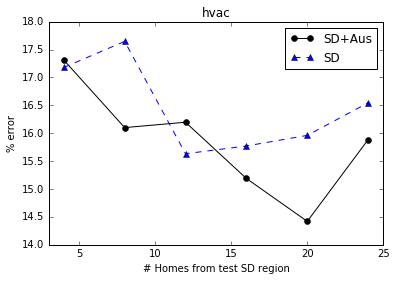

In [137]:
make_line_plot(out, 'hvac')

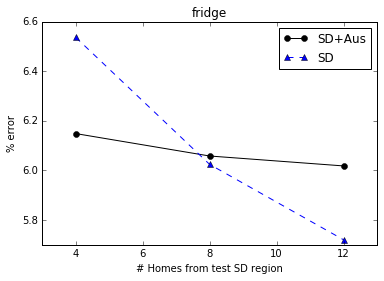

In [138]:
make_line_plot(out, 'fridge')

In [162]:
{
        'SD':pd.DataFrame(out['SD'][appliance]).T[['feature']],
            'SD+Aus':pd.DataFrame(out['SD'][appliance]).T[['feature']]}

{'SD':       feature
 4   (None, 1)
 8   (None, 1)
 12  (area, 2), 'SD+Aus':       feature
 4   (None, 1)
 8   (None, 1)
 12  (area, 2)}

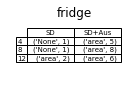

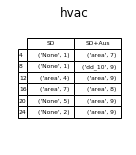

In [166]:
for appliance in ['fridge','hvac']:
    df = pd.DataFrame({
        'SD':pd.DataFrame(out['SD'][appliance]).T['feature'],
            'SD+Aus':pd.DataFrame(out['SD+Aus'][appliance]).T['feature']})

    nrows, ncols = len(df)+1, len(df.columns)
    hcell, wcell = 0.3, 1.
    hpad, wpad = 0, 0   

    #put the table on a correctly sized figure    
    fig=plt.figure(figsize=(ncols*wcell+wpad, nrows*hcell+hpad))
    plt.gca().axis('off')
    matplotlib_tab = pd.tools.plotting.table(plt.gca(),df, loc='center')    
    #pp.savefig()
    plt.tight_layout()
    plt.title(appliance)
    plt.savefig("../results/features_"+appliance+".png",bbox_inches="tight", dpi=800)


### Error analysis

SD + Aus training set

In [267]:
n_homes = 4 # Almost all homes from Austin
appliance='fridge'
feature, lat = out['SD+Aus'][appliance][n_homes]['feature']
pred_df = out_3_100[n_homes][appliance][feature][lat]
gt_fraction, pred_fraction = compute_fraction(appliance, pred_df)

In [304]:
lat

5

In [268]:
pred_df = pred_df.ix[valid_homes_data['SanDiego'][appliance]]

In [269]:
gt_df = out_overall[2014]['SanDiego'][pred_df.columns].ix[pred_df.index]

In [270]:
((pred_fraction-gt_fraction).mean(axis=1)<0).sum()*1./len(pred_fraction)

0.84615384615384615

In [292]:
from utility import plot_df_table

In [302]:
df = pd.DataFrame((pred_fraction-gt_fraction).mean(axis=1).describe()).astype('int')
df.index.name=appliance


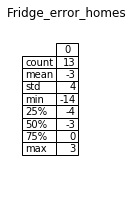

In [303]:
plot_df_table(df, 'Fridge_error_homes', '../results/fridge_error_homes.png')

,0
count,13.000000
mean,-3.070551
std,4.796855
min,-14.524015
25%,-4.081711
50%,-3.181704
75%,-0.177225
max,3.233659


In [274]:
pred_fraction.head()

,fridge_1,fridge_2,fridge_3,fridge_4,fridge_5,fridge_6,fridge_7,fridge_8,fridge_9,fridge_10,fridge_11,fridge_12
1450,7.570670,7.447383,9.325318,8.638054,5.045308,4.328411,4.816415,3.815813,3.856977,4.782417,6.163975,4.668073
1731,6.856690,10.973240,12.910294,8.762024,6.233998,10.773087,4.998122,5.099330,3.983052,7.315033,7.212339,9.540031
3687,8.114790,8.814169,9.102565,9.266506,7.998907,7.814411,5.422265,5.508150,6.225870,8.367889,10.731158,7.623967
3938,12.560057,13.413458,14.950003,15.911687,16.531179,19.813305,9.918985,11.088794,16.382119,16.997952,14.367285,17.244123
4495,11.232907,14.112599,15.256328,16.811928,17.771870,16.427914,13.300629,14.509934,12.240132,13.289124,13.192593,16.753276


In [275]:
gt_fraction.head()

,fridge_1,fridge_2,fridge_3,fridge_4,fridge_5,fridge_6,fridge_7,fridge_8,fridge_9,fridge_10,fridge_11,fridge_12
1450,6.816651,15.703506,17.537996,13.913089,7.989038,6.529579,7.912087,4.590261,4.755630,6.045774,8.078965,19.566765
1731,7.963714,10.574006,12.254955,8.158173,6.088804,10.521349,5.378233,5.491804,4.203771,7.241029,8.599692,10.308415
3687,15.251802,29.551287,28.704236,27.140217,23.260754,22.491938,16.315263,16.036351,17.964889,24.041460,26.245147,22.275480
3938,18.424256,18.309656,19.609474,21.068681,20.958290,25.494036,16.673551,16.149398,24.594063,22.645489,19.923253,19.951650
4495,16.198194,16.965554,17.947061,18.907195,21.839943,20.048573,19.208361,19.594707,14.737951,19.859558,18.202658,14.402738


In [282]:
((pred_df-gt_df)>0).sum(axis=1)

1450     1
1731     6
3687     0
3938     0
4495     1
5938     8
6377    10
7062     0
7114     1
8342     0
8574     2
9213     5
9775    11
dtype: int64

In [306]:
(pred_fraction-gt_fraction).mean(axis=1)

1450    -4.081711
1731    -0.177225
3687   -14.524015
3938    -5.385238
4495    -3.584438
5938    -0.110217
6377     3.233659
7062    -3.868756
7114    -3.181704
8342    -9.260821
8574    -0.842559
9213    -0.714048
9775     2.579911
dtype: float64

In [309]:
print pred_df.ix[3687].mean()
print gt_df.ix[3687].mean()
print gt_df.mean().mean()

42.73236474203333

In [314]:
print pred_df.ix[8342].mean()
print gt_df.ix[8342].mean()
print gt_df.mean().mean()

31.8262404334
48.2929697037
48.526385185


In [315]:
print pred_df.ix[9775].mean()
print gt_df.ix[9775].mean()
print gt_df.mean().mean()

53.0241180004
42.1533503532
48.526385185


In [285]:
pred_df.ix[9775]

0
fridge_1     41.119725
fridge_2     46.642916
fridge_3     53.695265
fridge_4     53.749725
fridge_5     57.977116
fridge_6     55.907570
fridge_7     55.081468
fridge_8     58.109928
fridge_9     55.577977
fridge_10    56.513143
fridge_11    49.349096
fridge_12    52.565487
Name: 9775, dtype: float64

In [286]:
gt_df.ix[9775]

fridge_1     30.502768
fridge_2     30.643467
fridge_3     35.652634
fridge_4     34.150833
fridge_5     36.914169
fridge_6     32.729198
fridge_7     45.165234
fridge_8     49.203285
fridge_9     52.186234
fridge_10    49.099617
fridge_11    58.499451
fridge_12    51.093315
Name: 9775, dtype: float64

In [289]:
out_overall[2014]['SanDiego']['area'].dropna()

203     1555.0
1450    1575.0
1524    2050.0
1731    1555.0
2354    2180.0
2606    1390.0
3864    1464.0
3938    1120.0
4495    1087.0
4761    1580.0
4934    1547.0
5009    1088.0
5909     670.0
5938    1476.0
6497    2050.0
6547    1547.0
7062    1400.0
7114    1401.0
8061    1600.0
8342    1401.0
8574    1400.0
9370    2050.0
9612    1555.0
9775    2300.0
Name: area, dtype: float64

In [15]:
def compute_rmse_fraction(appliance, pred_df):
    region = "Austin"
    df = out_overall[region]
    #pred_df = mf_pred[appliance][appliance_feature][latent_factors]
    gt_df = df[pred_df.columns].ix[pred_df.index]
    if appliance=="hvac":
        start, stop=5,11
    else:
        start, stop=1,13
    aggregate_df = df.ix[pred_df.index][['aggregate_%d' %month for month in range(start, stop)]]

    aggregate_df.columns = gt_df.columns
    gt_fraction = gt_df.div(aggregate_df)*100
    pred_fraction = pred_df.div(aggregate_df)*100
    
    pred_fraction = pred_fraction.dropna()
    gt_fraction = gt_fraction.dropna()
    print pred_fraction.describe()
    print gt_fraction.describe()


    rms = np.sqrt(mean_squared_error(pred_fraction,gt_fraction))
    return rms

In [7]:
result = {'MF':{},'KNN':{},'FHMM':{}}

## Computing for KNN

In [8]:
for appliance, appliance_df in knn_results.iteritems():
    
    pred_df = appliance_df
    pred_df.columns = [appliance+"_"+str(x) for x in pred_df.columns]
    rmse_fraction = compute_rmse_fraction(appliance, pred_df)
    

    #rms = np.sqrt(mean_squared_error(gt_df, pred_df))
    result['KNN'][appliance]=rmse_fraction

In [9]:
best_combination = {}
for appliance, appliance_struct in mf_pred.iteritems():
    print appliance
    best_appliance=1000
    for appliance_feature, appliance_feature_struct in appliance_struct.iteritems():
        for latent_factors, appliance_df in appliance_struct[appliance_feature].iteritems():
            try:
                region = "Austin"
                df = out_overall[region]
                pred_df = mf_pred[appliance][appliance_feature][latent_factors]
                
                rms = compute_rmse_fraction(appliance, pred_df)

                if rms<best_appliance:

                    best_appliance=rms
                    best_combination[appliance]=(appliance_feature, latent_factors, rms)
            except:
                pass
    result['MF'][appliance]=best_appliance
            
print best_combination

hvac
wm
fridge
mw
oven
dw
{'hvac': ('area', 9, 23.062443182449364), 'wm': ('occ', 3, 1.292907746177548), 'fridge': ('occ_area', 7, 56.419845955447094), 'mw': ('occ_area', 6, 0.9841175302519054), 'oven': ('occ', 8, 1.4241289192051436), 'dw': ('None', 5, 16.697917236289435)}


In [10]:
def get_fhmm(appliance):
    count = 0
    for test_region in ["Austin"]:
        out = {}
        test_df = out_overall[test_region]
        #test_df=test_df[(test_df.full_agg_available==1)&(test_df.md_available==1)]
        
        if appliance=="hvac":
            start, stop=5, 11
        else:
            start, stop=1, 13
        out[appliance] = {}
        test_df_appliance=test_df.ix[test_df[['%s_%d' %(appliance,month) for month in range(start,stop)]].dropna().index]
        for test_home in test_df_appliance.index:
            try:
                #print test_home
                pred_df = pd.read_csv("/Users/nipunbatra/wiki-15min-fhmm-out/%s_%d.csv" %(test_region, test_home),index_col=0)
                pred_df_appliance = pred_df[appliance].ix[start:stop-1]
                gt_df_appliance = test_df.ix[test_home][['%s_%d' %(appliance, month) for month in range(start, stop)]]
                gt_df_appliance.index = pred_df_appliance.index
                error = ((pred_df_appliance-gt_df_appliance).abs()*100/gt_df_appliance)
                #error[error>100]=100
                #acc = 100-error
                out[appliance][test_home]=pred_df_appliance
            except:
                pass
    return pd.DataFrame(out[appliance]).T

In [11]:
for appliance in knn_results.keys():
    
    pred_df = get_fhmm(appliance)
    pred_df.columns = [appliance+"_"+str(x) for x in pred_df.columns]
    rmse_fraction = compute_rmse_fraction(appliance, pred_df)
    

    #rms = np.sqrt(mean_squared_error(gt_df, pred_df))
    result['FHMM'][appliance]=rmse_fraction

In [16]:
compute_rmse_fraction(appliance, pred_df)

             dw_1        dw_2        dw_3        dw_4        dw_5        dw_6  \
count  172.000000  172.000000  172.000000  172.000000  172.000000  172.000000   
mean    15.966040   16.086284   15.580529   14.861408   14.777384   13.711349   
std      3.978736    3.855541    3.258583    3.259070    3.168031    3.516272   
min      7.958924    6.951908    7.837711    7.875402    8.262268    6.304880   
25%     13.393285   13.836726   13.344178   12.922074   12.459659   11.247675   
50%     15.678826   15.627400   15.380421   14.696483   14.459801   13.479161   
75%     18.147080   18.396278   17.538216   16.318403   16.865908   15.771734   
max     30.964608   30.054686   25.413095   26.992424   23.249597   25.493696   

             dw_7        dw_8        dw_9       dw_10       dw_11       dw_12  
count  172.000000  172.000000  172.000000  172.000000  172.000000  172.000000  
mean    13.030885   12.790405   13.533130   14.708571   15.840556   16.166775  
std      3.817893    3.800274 

13.977017942863627

In [88]:
map_appliance = {'fridge':'Fridge','dw':'Dish\nwasher','mw':'Microwave','hvac':'HVAC','oven':'Oven','wm':'Washing\nmachine'}

In [89]:
#results_df[results_df>100]=100
#results_df=results_df.fillna(100)
results_df.index = [map_appliance[appliance] for appliance in results_df.index]
#results_df.plot(kind='bar', colors=tableau20blind[::2])

In [90]:
results_df = results_df.ix[['HVAC','Fridge','Oven','Dish\nwasher','Washing\nmachine','Microwave']]

In [20]:
results_df = results_df[['KNN','MF']]

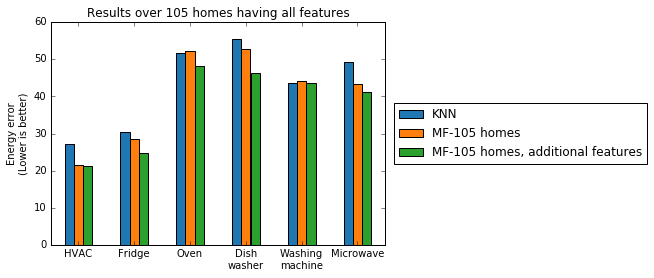

In [93]:
import matplotlib.pyplot as plt
results_df.plot(kind='bar',rot=0, colors=tableau20blind[::2])
lgd = plt.legend(loc='right', bbox_to_anchor=(1.8, 0.5))
plt.ylabel("Energy error\n(Lower is better)");
plt.title("Results over 105 homes having all features")
plt.savefig("../results/subset.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig("../results/subset.png",bbox_extra_artists=(lgd,), bbox_inches='tight')

Comparing MF with and without homes containing those features

In [23]:
best_combination

{'dw': ('occ', 1, 47.696584280069516),
 'fridge': ('occ_area', 2, 24.91311995551921),
 'hvac': ('rooms', 8, 21.29756141099046),
 'mw': ('occ', 2, 41.60195238757644),
 'oven': ('area_rooms', 8, 48.164684764512515),
 'wm': ('occ_rooms', 3, 43.7072363087808)}

In [31]:
pd.DataFrame(results)

,KNN,MF
dw,55.305178,47.696584
fridge,30.453563,24.913120
hvac,27.268441,21.297561
mw,49.199756,41.601952
oven,51.708601,48.164685
wm,43.735111,43.707236


In [100]:
for appliance in ['fridge','hvac','dw','mw','wm','oven']:
    mf_best = mf_pred[appliance][best_combination[appliance][0]][best_combination[appliance][1]]
    knn_best = knn_results[appliance]
    mf_best.columns = knn_best.columns
    common_index = np.intersect1d(mf_best.index, knn_best.index)
    mf_best = mf_best.ix[common_index]
    knn_best = knn_best.ix[common_index]
    knn_best_copy = knn_best.copy()
    mf_best_copy = mf_best.copy()
    max_two = (mf_best_copy.where(mf_best_copy > knn_best_copy, knn_best_copy).fillna(mf_best_copy))
    print appliance,100*((-mf_best+knn_best)/max_two).unstack().std()

fridge 57.3978457853
hvac 55.0774075892
dw 51.1713352881
mw 57.3493816955
wm 53.9492074301
oven 55.2763277251


In [ ]:
Calculating win/loss

In [97]:
o = {}
for appliance in ['fridge','hvac','dw','mw','wm','oven']:
    print appliance
    mf_best_pred = mf_pred[appliance][best_combination[appliance][0]][best_combination[appliance][1]]
    knn_best_pred = knn_results[appliance]
    mf_best_pred.columns = knn_best_pred.columns
    common_index = np.intersect1d(mf_best_pred.index, knn_best_pred.index)
    region = "Austin"
    df = out_overall[region]
    pred_df = mf_pred[appliance][appliance_feature][latent_factors]
    gt_df = df[pred_df.columns].ix[pred_df.index]
    mf_best_pred = mf_best_pred.ix[common_index]
    knn_best_pred = knn_best_pred.ix[common_index]
    error_mf = (gt_df-mf_best_pred).abs()
    error_knn = (gt_df-knn_best_pred).abs()
    win = (error_knn>error_mf).sum().sum()
    loss = (error_knn<error_mf).sum().sum()
   
    o[appliance]={'win':win, "loss":loss, "win/loss":win*1./loss,"win/(win_loss)":win*1./(win+loss)}

fridge
hvac
dw
mw
wm
oven


In [98]:
pd.DataFrame(o).T

,loss,win,win/(win_loss),win/loss
dw,288,408,0.586207,1.416667
fridge,423,393,0.481618,0.929078
hvac,277,293,0.514035,1.057762
mw,249,315,0.558511,1.265060
oven,179,181,0.502778,1.011173
wm,358,338,0.485632,0.944134


In [92]:
knn_best_pred.columns, mf_best_pred.columns

(Index([u'hvac_5', u'hvac_6', u'hvac_7', u'hvac_8', u'hvac_9', u'hvac_10'], dtype='object'),
 Index([u'hvac_5', u'hvac_6', u'hvac_7', u'hvac_8', u'hvac_9', u'hvac_10'], dtype='object'))

In [118]:
knn_best.median().mean()

51.70860070119945

In [119]:
appliance

'oven'